# Example from the paper

In [1]:
# use the outgrad backage for the coputations of gradient
import functions 
import autograd.numpy as np
import pandas as pd
import subprocess
import time
import matplotlib.pyplot as plt
   
np.random.seed(0)                      # to obtain a consistent solution

In [3]:
#define the right side function of the system of differential equations
def right_side(x, y):
    f1 = np.cos(x)+(y[0])**2+y[1]-(1+x**2+np.sin(x)*np.sin(x))
    f2 = 2*x-(1+x*x)*np.sin(x) + y[0]*y[1]
    return np.array([f1,f2])

In [4]:
# the initial values 
a1 = 0
a2=  1.0

In [5]:
# the analytical solution is given by 
def analytic(x):
    an_sol = np.zeros((2, len(x)))
    an_sol[0] = np.sin(x)
    an_sol[1] = 1+x*x  
    return an_sol  

Cost after iteration 10: 2.296686
Cost after iteration 20: 0.821523
Cost after iteration 30: 0.364431
Cost after iteration 40: 0.096480
Cost after iteration 50: 0.040598
Cost after iteration 60: 0.022038
Cost after iteration 70: 0.017888
Cost after iteration 80: 0.017338
Cost after iteration 90: 0.015742
Cost after iteration 100: 0.015037
time : 0.26785898208618164s
Cost after iteration 10: 0.864077
Cost after iteration 20: 0.139856
Cost after iteration 30: 0.090678
Cost after iteration 40: 0.044766
Cost after iteration 50: 0.015338
Cost after iteration 60: 0.009372
Cost after iteration 70: 0.007941
Cost after iteration 80: 0.007922
Cost after iteration 90: 0.007955
Cost after iteration 100: 0.007860
time : 0.3099048137664795s
Cost after iteration 10: 2.590096
Cost after iteration 20: 1.183616
Cost after iteration 30: 0.660908
Cost after iteration 40: 0.213475
Cost after iteration 50: 0.077159
Cost after iteration 60: 0.059607
Cost after iteration 70: 0.039034
Cost after iteration 80: 

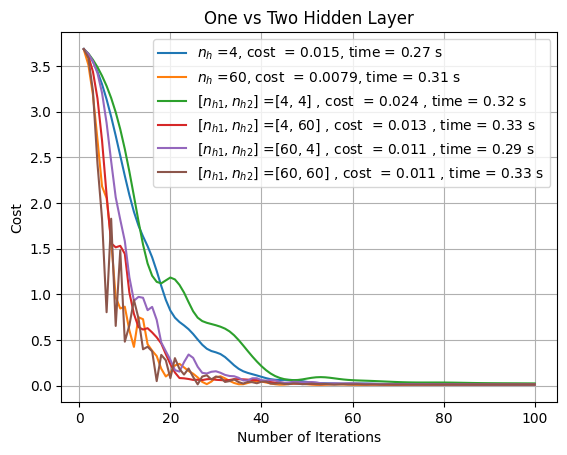

In [6]:
#================Experiment 2: one vs two hidden layers - for different number of neurons in each=============================
"""
Experiment for comparing one hidden layer vs two hidden layers.
The code is for system of differential equations with two uknowns.
"""
# Input Data
a , b= [0.0, 1.0]               # the domain        
m = 11                          # number of sample points between a and b.

x = np.linspace(a,b, m)         # generate m sample points

X = np.zeros((1,m))             # form a matrix containing the sample points
X[0] = x

H = [4, 60]                     # different sizes for the hidden layer1

ITs = 100                       # number of iterations 
tol = 1e-04                     # the tollerance
# For one hidden layer
fig2 = plt.figure()
# 1 layer NN
for h in  H:            
    # The training, measuring the time for the convergence corresponding to the size of neurons.
    tic = time.time()
    param1, param2, Cost, Iter = functions.ode_nn_model1(X, h, a1, a2, a, right_side, tol, ITs, iter = 0, print_cost = True)
    toc = time.time()
    print("time : " + str((toc-tic))+ "s")
    
    #plot
    plt.plot(Iter, Cost, label='$ n_{h}$ =' + str(h)+ ', cost  = ' + str(round(Cost[-1], 4)) + ', time = ' + str(round((toc-tic),2)) + ' s')
# For two hidden layers

H1 = [4, 60]
H2 = [4, 60]

# 2 layers NN
for h1 in range(0, len(H1)):
    for h2 in range(0, len(H2)):             
        # The training, measuring the time for the convergence corresponding to the size of neurons.    
        tic = time.time()
        param1, param2, Cost, Iter = functions.ode_nn_model2(X, H1[h1], H2[h2],  a1, a2, a, right_side, tol, ITs, iter = 0, print_cost = True)
        toc = time.time()
        print("time of computation: " + str((toc-tic))+ "s")            
    
        #plots the out come at the end of iteration, with error and time inforamtion
        plt.plot(Iter, Cost, label='$[n_{h1},n_{h2}]$ ='+str([H1[h1],H2[h2]]) + ' , cost  = ' + str(round(Cost[-1],3)) + ' , time = ' + str(round((toc-tic),2)) + ' s')

plt.legend()
plt.title("One vs Two Hidden Layer" )
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.show()